# PROACT Dataset

In [44]:

import config as cfg
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

matplotlib_style = 'default'
import matplotlib.pyplot as plt; plt.style.use(matplotlib_style)
plt.rcParams.update({'axes.labelsize': 'medium',
                     'axes.titlesize': 'medium',
                     'font.size': 14.0,
                     'text.usetex': True,
                     'text.latex.preamble': r'\usepackage{amsfonts} \usepackage{bm}'})

df = pd.read_csv(Path.joinpath(cfg.PROACT_DATA_DIR, 'proact_processed.csv'), index_col=0)
df = df.loc[(df['TTE_Speech'] > 0) & (df['TTE_Swallowing'] > 0)
            & (df['TTE_Handwriting'] > 0) & (df['TTE_Walking'] > 0)
            & (df['TTE_Salivation'] > 0) & (df['TTE_Death'] > 0)] # min time
df = df.loc[(df['TTE_Speech'] <= 1800) & (df['TTE_Swallowing'] <= 1800)
            & (df['TTE_Handwriting'] <= 1800) & (df['TTE_Walking'] <= 1800)
            & (df['TTE_Salivation'] <= 1800) & (df['TTE_Death'] <= 1800)] # 5 years max
event_cols = ['Speech', 'Salivation', 'Swallowing', 'Handwriting', 'Walking', 'Death']

# Rename columns for readability
df = df.rename({"Event_Speech": "Speech",
                "Event_Salivation": "Salivation",
                "Event_Swallowing": "Swallowing",
                "Event_Handwriting": "Handwriting",
                "Event_Walking": "Walking",
                "Event_Death": "Death"}, axis=1)

In [45]:
for event_col in event_cols:
    obs_arr = np.array(df[event_col])
    n_censored = obs_arr.shape[0] - obs_arr.sum()
    print(f"Number of samples: {len(df)}")
    print(f"Number of censored/uncensored: {n_censored}/{obs_arr.shape[0]-n_censored}")
    print(f"{round((obs_arr.shape[0]-n_censored) / obs_arr.shape[0] * 100, 2)}% of records are uncensored\n")

Number of samples: 5002
Number of censored/uncensored: 3179/1823
36.45% of records are uncensored

Number of samples: 5002
Number of censored/uncensored: 3441/1561
31.21% of records are uncensored

Number of samples: 5002
Number of censored/uncensored: 3479/1523
30.45% of records are uncensored

Number of samples: 5002
Number of censored/uncensored: 2393/2609
52.16% of records are uncensored

Number of samples: 5002
Number of censored/uncensored: 1922/3080
61.58% of records are uncensored

Number of samples: 5002
Number of censored/uncensored: 3782/1220
24.39% of records are uncensored



In [46]:
df.columns

Index(['TTE_Speech', 'Speech', 'TTE_Salivation', 'Salivation',
       'TTE_Swallowing', 'Swallowing', 'TTE_Handwriting', 'Handwriting',
       'TTE_Walking', 'Walking', 'ALSFRS_R_Total', 'Age', 'Race_Caucasian',
       'Sex', 'Weight', 'Height', 'Site_of_Onset', 'Diagnosis_Delta',
       'Subject_used_Riluzole', 'El_escorial', 'Death', 'TTE_Death', 'FVC_Min',
       'FVC_Max', 'FVC_Mean', 'Handgrip_Strength',
       'ABDUCTOR_POLLICIS_BREVIS_Strength', 'ANKLE_Strength', 'ELBOW_Strength',
       'FIRST_DORSAL_INTEROSSEOUS_OF_THE_HAND_Strength', 'HIP_FLEXOR_Strength',
       'KNEE_Strength', 'SHOULDER_Strength', 'WRIST_Strength'],
      dtype='object')

In [81]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

# Print statistics on people that don't experience death event
df['Time_in_study'] = df.apply(lambda x: max(x['TTE_Speech'], x['TTE_Swallowing'],  x['TTE_Handwriting'],
                                             x['TTE_Walking'], x['TTE_Salivation'], x['Death']), axis=1)
df['SOO_Limb'] = df['Site_of_Onset'].apply(lambda x: 1 if x in ["Limb", "LimbAndBulbar"] else 0)
df['SOO_Bulbar'] = df['Site_of_Onset'].apply(lambda x: 1 if x in ["Bulbar", "LimbAndBulbar"] else 0)
df['SOO_Spine'] = df['Site_of_Onset'].apply(lambda x: 1 if x in ["Spine"] else 0)

num_features = ['Age', 'Height', 'Weight', 'ALSFRS_R_Total', 'Time_in_study']
cat_features = ['Sex', 'Race_Caucasian', 'SOO_Limb', 'SOO_Bulbar', 'SOO_Spine', 'Subject_used_Riluzole']
df_no_deaths = df.loc[df['Death'] == 0]
df_deaths = df.loc[df['Death'] == 1]

for col in num_features:
    mean_no_deaths = df_no_deaths[col].astype(float).mean(axis=0).round(1)
    mean_deaths = df_deaths[col].astype(float).mean(axis=0).round(1)
    std_no_deaths = df_no_deaths[col].astype(float).std(axis=0).round(1)
    std_deaths = df_deaths[col].astype(float).std(axis=0).round(1)
    
    text_no_deaths = mean_no_deaths.astype(str) + " (" + std_no_deaths.astype(str) + ")"
    text_deaths = mean_deaths.astype(str) + " (" + std_deaths.astype(str) + ")"
    print(f"{col} (event): {text_no_deaths} - {col} (death): {text_deaths}")

print()
print(f"Percentage of female: {df['Sex'].value_counts(normalize=True)['Female'] * 100:.1f}%")
print(f"Percentage of Caucasian: {df['Race_Caucasian'].value_counts(normalize=True)[1.0] * 100:.1f}%")
print(f"Percentage of SOO_Limb: {df['SOO_Limb'].value_counts(normalize=True)[1] * 100:.1f}%")
print(f"Percentage of SOO_Bulbar: {df['SOO_Bulbar'].value_counts(normalize=True)[1] * 100:.1f}%")
print(f"Percentage of SOO_Spine: {df['SOO_Spine'].value_counts(normalize=True)[1] * 100:.1f}%")
print(f"Percentage of Subject_used_Riluzole: {df['Subject_used_Riluzole'].value_counts(normalize=True)['Yes'] * 100:.1f}%")

Age (event): 53.3 (11.8) - Age (death): 60.0 (9.6)
Height (event): 171.0 (18.6) - Height (death): 170.5 (11.0)
Weight (event): 75.7 (15.7) - Weight (death): 69.6 (12.2)
ALSFRS_R_Total (event): 39.9 (4.9) - ALSFRS_R_Total (death): 38.4 (5.1)
Time_in_study (event): 392.8 (176.6) - Time_in_study (death): 267.5 (164.7)

Percentage of female: 31.8%
Percentage of Caucasian: 93.8%
Percentage of SOO_Limb: 55.9%
Percentage of SOO_Bulbar: 15.4%
Percentage of SOO_Spine: 0.9%
Percentage of Subject_used_Riluzole: 67.3%


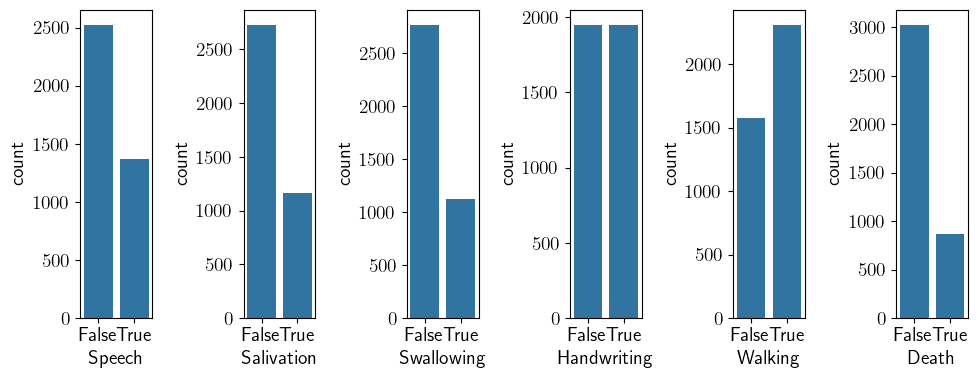

In [9]:
fig, axs = plt.subplots(ncols=len(event_cols), figsize=(10,4))
for i, col in enumerate(event_cols):
    sns.countplot(x=col, data=df, ax=axs[i])
plt.tight_layout()
plt.show()

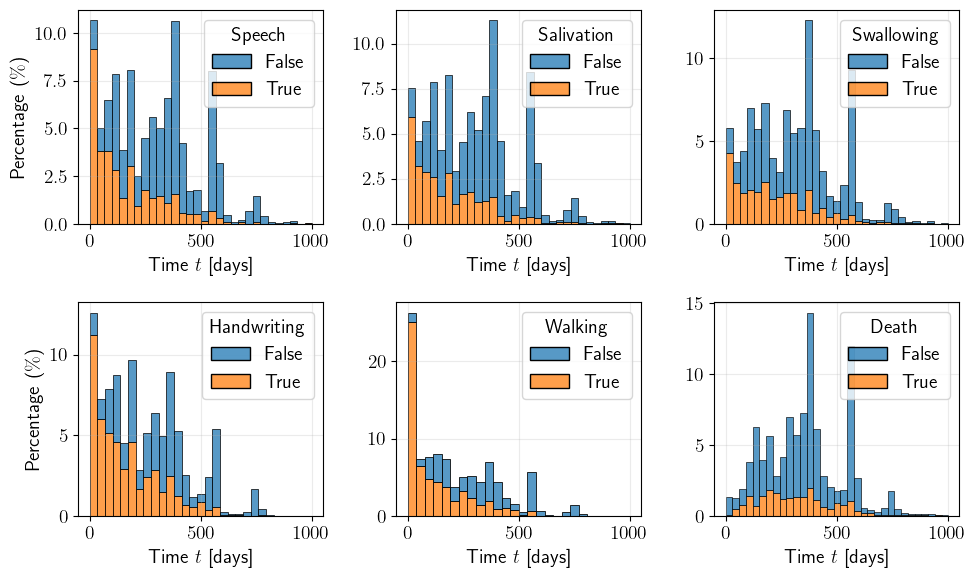

In [10]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))
axs = axs.flatten()
for i, col in enumerate(event_cols):
    event = df[[f'TTE_{col}', f'{col}']]
    sns.histplot(x=f'TTE_{col}', data=event, hue=f'{col}', multiple="stack", bins="auto", ax=axs[i], binrange=(0, 1000), stat="percent")
    axs[i].set_xlabel("Time $t$ [days]")
    if i % 3 == 0:  # Add ylabel only to the first column in each row
        axs[i].set_ylabel("Percentage ($\%$)")
    else:
        axs[i].set_ylabel("")
    axs[i].grid(True, alpha=0.25)
plt.tight_layout()
plt.show()